<a href="https://colab.research.google.com/github/abd-RAHEEM/P_D_model/blob/main/Pneumonia_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation

In [ ]:
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulraheem145145","key":"816ee1a7a1f5c735c06a746ba2f90b35"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import zipfile
with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.26G/2.29G [00:16<00:00, 55.8MB/s]
100% 2.29G/2.29G [00:16<00:00, 147MB/s] 


In [ ]:
# Define image dimensions and batch size
image_height, image_width = 150, 150
batch_size = 32

# Set the paths to your dataset
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# Create an augmented data generator for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Create a data generator for validation and test sets (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary') # Binary because we have two classes: Normal and Pneumonia

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the results to feed into a dense layer
    Flatten(),

    # Dense layer for classification
    Dense(512, activation='relu'),
    Dropout(0.5), # Add dropout for regularization

    # Output layer with a single neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Print a summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Set the number of epochs
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.7238 - loss: 0.6522 - val_accuracy: 0.5625 - val_loss: 0.7940
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.7947 - loss: 0.4069 - val_accuracy: 0.8750 - val_loss: 0.5344
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8400 - loss: 0.3571 - val_accuracy: 0.9375 - val_loss: 0.3870
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.8564 - loss: 0.3248 - val_accuracy: 0.6875 - val_loss: 1.0495
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.8759 - loss: 0.2835 - val_accuracy: 0.9375 - val_loss: 0.3438
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.8942 - loss: 0.2431 - val_accuracy: 0.8750 - val_loss: 0.3289
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.8974 - loss: 0.2499 - val_accuracy: 0.8125 - val_loss: 0.3567
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.8998 - loss: 0.2377 - val_accu

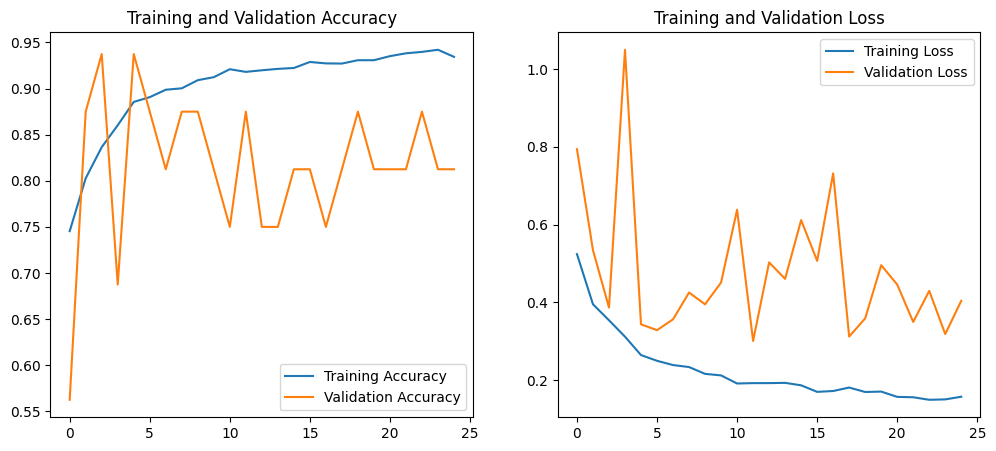

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

# Path to an image you want to test
test_image_path = '/content/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'

img = image.load_img(test_image_path, target_size=(image_height, image_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Create a batch

# Rescale the image
img_array /= 255.0

# Make the prediction
prediction = model.predict(img_array)

print(f"Prediction Value: {prediction[0][0]}")

if prediction[0][0] > 0.5:
    print("The model predicts: Pneumonia")
else:
    print("The model predicts: Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Prediction Value: 0.999925434589386
The model predicts: Pneumonia
